In [198]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime

#import xlwings as xl

#def df_from_excel(path):
#    app = xl.App(visible=False)
#    book = app.books.open(path)
#    book.save()
#    app.kill()
#    return pd.read_excel(path, sheet_name=None)



In [199]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')

risk_set_a = set(['1H','2H','3H'])
risk_set_b = set(['4H','5H','6V','7V','8H'])
risk_set_c = set(['9V','10V'])
risk_set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
risk_set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
risk_set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
risk_set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
risk_set_h = set(['74V','75H','76H','76V','77V'])
risk_set_i = set(['78V','79H','79V','80H'])


In [200]:
week_num

'22'

In [201]:
PRACTICE = 'All'
FOLDER = '/300518'

In [202]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [203]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/300518'

In [204]:
# Workaround: had to rename the files due to formatting issues.  Pandas doesn't seem to like
# multiple full stops.

for filename in os.listdir(os.getcwd()):
    os.rename(filename, filename[:14:]+".xlsx")
    print filename[:14:]

GDPR-RS-EPS063
GDPR-RS-EPS158
GDPR-RS-EPS052
GDPR-RS-EPS141
GDPR-RS-EPS087
GDPR-RS-EPS156
GDPR-RS-EPS102
GDPR-RS-EPS091
GDPR-RS-EPS070
GDPR-RS-EPS094
GDPR-RS-EPS021
GDPR-RS-EPS057
GDPR-RS-EPS110
GDPR-RS-EPS049
GDPR-RS-EPS189
GDPR-RS-EPS033
GDPR-RS-EPS116
GDPR-RS-EPS012
GDPR-RS-EPS121
GDPR-RS-EPS117
GDPR-RS-EPS042
GDPR-RS-EPS080
GDPR-RS-EPS066
GDPR-RS-EPS130
GDPR-RS-EPS055
GDPR-RS-EPS109
GDPR-RS-EPS054
GDPR-RS-EPS071
GDPR-RS-EPS103
GDPR-RS-EPS001
GDPR-RS-EPS123
GDPR-RS-EPS067
GDPR-RS-EPS022
GDPR-RS-EPS007
GDPR-RS-EPS056
GDPR-RS-EPS044
GDPR-RS-EPS081
GDPR-RS-EPS008
GDPR-RS-EPS068
GDPR-RS-EPS031
GDPR-RS-EPS118
GDPR-RS-EPS064
GDPR-RS-EPS002
GDPR-RS-EPS176
GDPR-RS-EPS072
GDPR-RS-EPS136
GDPR-RS-EPS059
GDPR-RS-EPS127
GDPR-RS-EPS198
GDPR-RS-EPS046
GDPR-RS-EPS126
GDPR-RS-EPS004
GDPR-RS-EPS062
GDPR-RS-EPS129
GDPR-RS-EPS010
GDPR-RS-EPS016
GDPR-RS-EPS090
GDPR-RS-EPS005
GDPR-RS-EPS089
GDPR-RS-EPS043
GDPR-RS-EPS029
GDPR-RS-EPS009
GDPR-RS-EPS027
GDPR-RS-EPS147
GDPR-RS-EPS097
GDPR-RS-EPS028
GDPR-RS-EP

In [205]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

all_set = set()

all_set.update(iot_set)
all_set.update(cloud_set)
all_set.update(connectivity_set)
all_set.update(eit_set)
all_set.update(uc_set)

req_ref_list = list()

first = True
file_count = 0
product_id = 0

#df = df_from_excel(path to your file)

for filename in os.listdir(os.getcwd()):
    print filename
    df = pd.read_excel(filename, sheet_name=None)
    #df = df_from_excel(filename)
    
    file_count = file_count + 1
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    
    product_id = int(filename[11:14])
    print product_id
    all_set.remove(product_id)

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        print sh
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].insert(loc=1, column='Product ID', value=product_id)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename',\
                             'Product ID',\
                             'Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            
            req_ref_list.extend(list(df[sh]['Req Ref']))
            
            first = False
        else:
            cp_df = df[sh][['Filename',\
                            'Product ID',\
                            'Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count

            req_ref_list.extend(list(df[sh]['Req Ref']))

            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)
            
print file_count

GDPR-RS-EPS063.xlsx
63
Entity count: 1
A - Exchange Application
GDPR-RS-EPS158.xlsx
158
Entity count: 4
A - Portal
B - Business Logic
C - WAN-CPE
D - Database
GDPR-RS-EPS052.xlsx
52
Entity count: 1
A - Flexible Computing
GDPR-RS-EPS141.xlsx
141
Entity count: 1
A - Docusign
GDPR-RS-EPS087.xlsx
87
Entity count: 4
A - SSM Portal
B - IVR Applications
C - Web Logic Portal
D - Database
GDPR-RS-EPS156.xlsx
156
Entity count: 4
A - Portal
B - Business Logic
C - WAN-CPE
D - Database
GDPR-RS-EPS102.xlsx
102
Entity count: 1
A - RMCS
GDPR-RS-EPS091.xlsx
91
Entity count: 4
A - GUI
B - APRM
C - MZ
D - Database
GDPR-RS-EPS070.xlsx
70
Entity count: 2
A - Recording Server
B - Miscellaneous
GDPR-RS-EPS094.xlsx
94
Entity count: 3
A - Portal
B - Business Logic
C - Database
GDPR-RS-EPS021.xlsx
21
Entity count: 4
A - Portal
B - Business Logic
C - VTR App Server
D - Database
GDPR-RS-EPS057.xlsx
57
Entity count: 1
A - Threat Management
GDPR-RS-EPS110.xlsx
110
Entity count: 4
A - Portal
B - Business Logic
C - D

In [206]:
#missing products
all_set

{14, 24, 101, 193, 194, 195}

In [207]:
len(req_ref_list)

7267

In [208]:
iot_set

{67, 68, 89, 90, 91, 94, 97, 101, 102, 103, 109, 110}

In [209]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

out_df['Category'].replace('-PC', 'PCA', inplace=True)
out_df['Category'].replace('-SC', 'SCA', inplace=True)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [210]:
def return_practice( prod_id ):
    #print int(prod_id)
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        print "Unknown Practice"
        return 'Unknown Practice'

out_df['Product ID'].dropna(inplace=True)    
    
out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))

In [211]:
def return_risk_set( req_id ):
    if req_id in risk_set_a:
        return 'A'
    elif req_id in risk_set_b:
        return 'B'
    elif req_id in risk_set_c:
        return 'C'
    elif req_id in risk_set_d:
        return 'D'
    elif req_id in risk_set_e:
        return 'E'
    elif req_id in risk_set_f:
        return 'F'
    elif req_id in risk_set_g:
        return 'G'
    elif req_id in risk_set_h:
        return 'H'
    elif req_id in risk_set_i:
        return 'I'
    else:
        return 'UNKNOWN'
    
out_df['Risk Category'] = out_df['Req nr'].map(lambda x: return_risk_set(x))

    

In [212]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category
0,PARTIALLY COMPLIANT,30th April 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-1H-A,1H,Completed,Governance Framework and application of Privac...,EPS063-PCA-1H,PCA,Project Code Allocated,Cloud,A
1,NON-COMPLIANT,30th April 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-2H-A,2H,Completed,Governance Framework and application of Privac...,EPS063-PCA-2H,PCA,Project Code Allocated,Cloud,A
2,PARTIALLY COMPLIANT,22nd May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57H-A,57H,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57H,PCA,Project Code Allocated,Cloud,F
3,PARTIALLY COMPLIANT,22nd May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57V-A,57V,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57V,PCA,Project Code Allocated,Cloud,F
4,PARTIALLY COMPLIANT,11th May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-58H-A,58H,Completed,Horizontal section 10 Processor Obligations al...,EPS063-PCA-58H,PCA,Project Code Allocated,Cloud,F


In [213]:
def return_h_or_v( req_id ):
    req_id_str = str(req_id)
    if "H" in req_id_str:
        return 'HORIZONTAL'
    elif "V" in req_id_str:
        return 'VERTICAL'
    else:
        return 'UNKNOWN'
    
out_df['Horizontal / Vertical'] = out_df['Req nr'].map(lambda x: return_h_or_v(x))


In [214]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [215]:
#FIXME: Bug!
out_df['Product ID'].fillna('dropme',inplace=True)

out_df = out_df[out_df['Product ID'] != 'dropme'].copy()


In [216]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,PARTIALLY COMPLIANT,30th April 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-1H-A,1H,Completed,Governance Framework and application of Privac...,EPS063-PCA-1H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
1,NON-COMPLIANT,30th April 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-2H-A,2H,Completed,Governance Framework and application of Privac...,EPS063-PCA-2H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,22nd May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57H-A,57H,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,22nd May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57V-A,57V,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57V,PCA,Project Code Allocated,Cloud,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,11th May 2018,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-58H-A,58H,Completed,Horizontal section 10 Processor Obligations al...,EPS063-PCA-58H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,


In [217]:
req_ref_list = list(out_df['Req Ref'])
duplicates = set([x for x in req_ref_list if req_ref_list.count(x) > 1])
      
if len(duplicates) > 0:
    print duplicates
    sys.exit("EXIT: duplicates found")

In [218]:
zero_time = datetime.strptime('00:00:00', '%H:%M:%S').time()
zero_time

datetime.time(0, 0)

In [219]:
# if requirement is clodsed or completed and the date is missing or in the future,
# then set the date to today.

In [220]:
out_df['Delivery Date'].replace(to_replace='25/5//18', 
                                value=datetime(2018,5,25), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace=['GE-PCA-75H', 'GE-PCA-52H'], 
                                value=datetime(2018,5,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='11th May 2018', 
                                value=datetime(2018,5,11), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='30th April 2018', 
                                value=datetime(2018,4,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='22nd May 2018', 
                                value=datetime(2018,5,22), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='22nd May', 
                                value=datetime(2018,5,22), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace=zero_time, 
                                value=datetime(2018,5,30), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)



In [221]:
out_df.loc[out_df['Category'] == 'SCA','Horizontal / Vertical'] = 'VERTICAL'

In [222]:
out_df.loc[(out_df['Category'] == 'SCA')&
           (out_df['Compliance Assessment'] == 'N/A'),'Compliance Assessment'] = '0 - n/a'


In [223]:
out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == 'TBC'),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,10,30)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == 'TBC'),'Delivery Date'] = datetime(2018,10,30)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,10,30)


In [224]:
out_df['Delivery Date'].value_counts()

2018-10-31    1750
2018-05-18    1517
2018-10-30     903
2018-05-25     722
2018-05-11     355
2018-11-20     291
2018-04-30     233
2018-05-04     177
2018-09-25     174
2018-05-22     125
2018-06-30      97
2018-03-31      82
2018-04-27      81
2018-06-08      79
2018-04-18      76
2018-05-01      62
2018-05-15      59
2018-05-30      48
2018-02-28      45
2018-05-31      37
2018-07-30      36
2018-07-07      36
2018-10-19      32
2018-06-29      30
2018-07-03      30
2018-09-30      25
2018-09-11      23
2017-04-30      22
2018-08-31      15
2018-06-04      12
2018-09-28      12
2018-07-31      12
2018-06-01      10
2018-05-02      10
2018-06-15       6
2018-04-03       4
2018-03-30       4
2017-10-31       4
2018-03-28       2
2018-08-30       2
2018-03-07       2
2018-07-10       1
2018-07-12       1
2018-07-11       1
2018-07-09       1
2018-07-08       1
Name: Delivery Date, dtype: int64

In [225]:
"""
'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
"""

out_df['Compliance Assessment'].replace(to_replace='Fully compliant', 
                                value='FULLY COMPLIANT', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].replace(to_replace='Fully Compliant', 
                                value='FULLY COMPLIANT', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].replace(to_replace='Not applicable', 
                                value='N/A', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].replace(to_replace='not applicable', 
                                value='N/A', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].replace(to_replace='N/a', 
                                value='N/A', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].replace(to_replace='Partially Compliant', 
                                value='PARTIALLY COMPLIANT', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT                                             1812
FULLY COMPLIANT                                                 1759
NON-COMPLIANT                                                    882
4 - Broadly adequate / Observation                               846
3 - Partially adequate / Minor Non-Conformity (low severity)     483
N/A                                                              397
PARTIALLY COMPLIANT f                                            291
PARTIALLY COMPLIANT                                              270
2 - Inadequate / Minor Non-Conformity (high severity)            267
NON-COMPLIANT f                                                  115
1 - Very Inadequate / Major Non-Conformity                        91
NON-COMPLIANT                                                     29
COMPLIANT                                                          4
0 - n/a                                                            1
Name: Compliance Assessment, dtype

In [226]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,'Chart to show all requirements and their response types: All 31-05-2018')

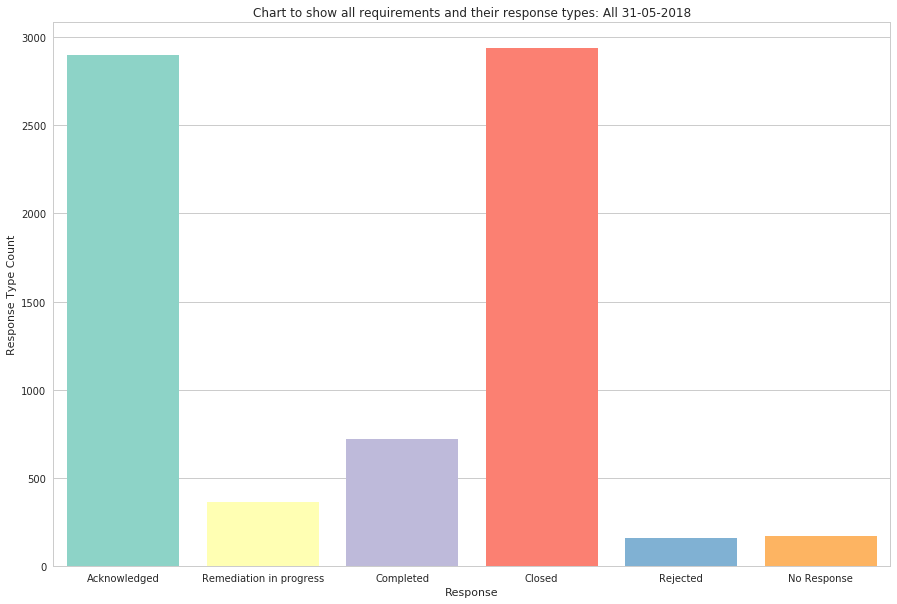

In [227]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3',
                  order=['Acknowledged','Remediation in progress','Completed',
                         'Closed','Rejected','No Response'])
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [228]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

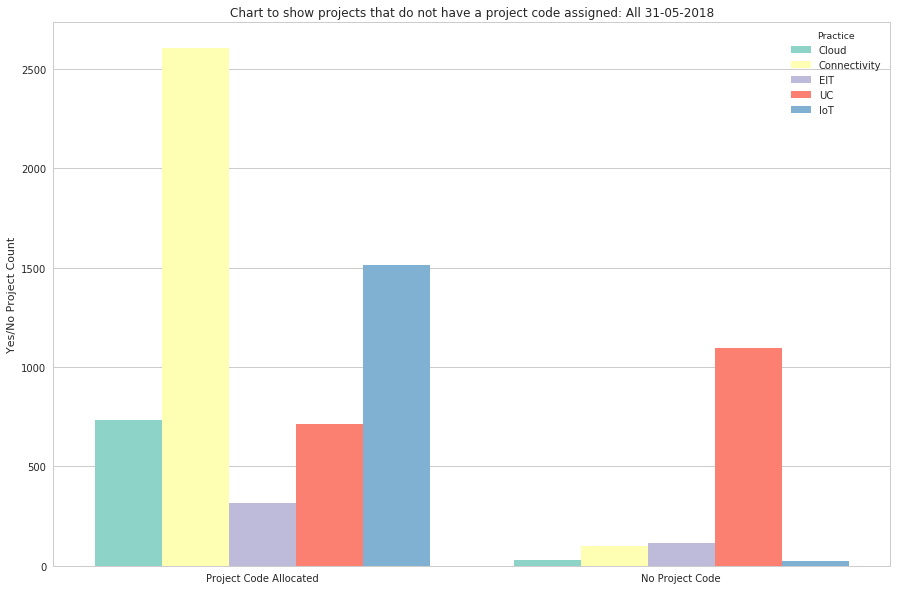

In [229]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")

In [230]:
out_df[out_df['Practice']=='Unknown Practice']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


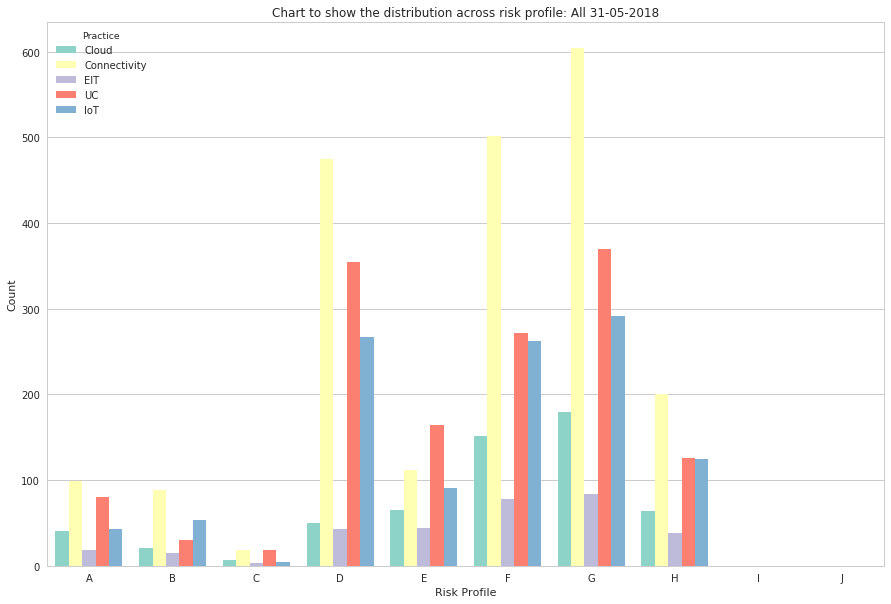

In [231]:
#out_df[out_df['Category']=='PCA']['Risk Category'].value_counts(dropna=False,sort=False)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df[out_df['Category']=='PCA'], ax=ax, x='Risk Category', 
                   hue='Practice',saturation=1, palette='Set3',
                   order=['A','B','C','D','E','F','G','H','I','J'])
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-risk-cats-fig-"+today+".png")

In [232]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Closed                     2939
Acknowledged               2898
Completed                   721
Remediation in progress     362
No Response                 171
Rejected                    156
Name: Response, dtype: int64

In [233]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [234]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,PARTIALLY COMPLIANT,2018-04-18 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-1H-A,1H,Completed,Governance Framework and application of Privac...,EPS063-PCA-1H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-04-18 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-2H-A,2H,Completed,Governance Framework and application of Privac...,EPS063-PCA-2H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,2018-05-22 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57H-A,57H,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,2018-05-22 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57V-A,57V,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57V,PCA,Project Code Allocated,Cloud,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,2018-05-11 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-58H-A,58H,Completed,Horizontal section 10 Processor Obligations al...,EPS063-PCA-58H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,


In [236]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,PARTIALLY COMPLIANT,2018-04-18 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-1H-A,1H,Completed,Governance Framework and application of Privac...,EPS063-PCA-1H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-04-18 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-2H-A,2H,Completed,Governance Framework and application of Privac...,EPS063-PCA-2H,PCA,Project Code Allocated,Cloud,A,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,2018-05-22 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57H-A,57H,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,2018-05-22 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-57V-A,57V,Completed,Hybrid Processor Obligations work section 10 a...,EPS063-PCA-57V,PCA,Project Code Allocated,Cloud,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,2018-05-11 00:00:00,1.0,GDPR-RS-EPS063.xlsx,063,PRJ03563,EPS063-PCA-58H-A,58H,Completed,Horizontal section 10 Processor Obligations al...,EPS063-PCA-58H,PCA,Project Code Allocated,Cloud,F,HORIZONTAL,,,
